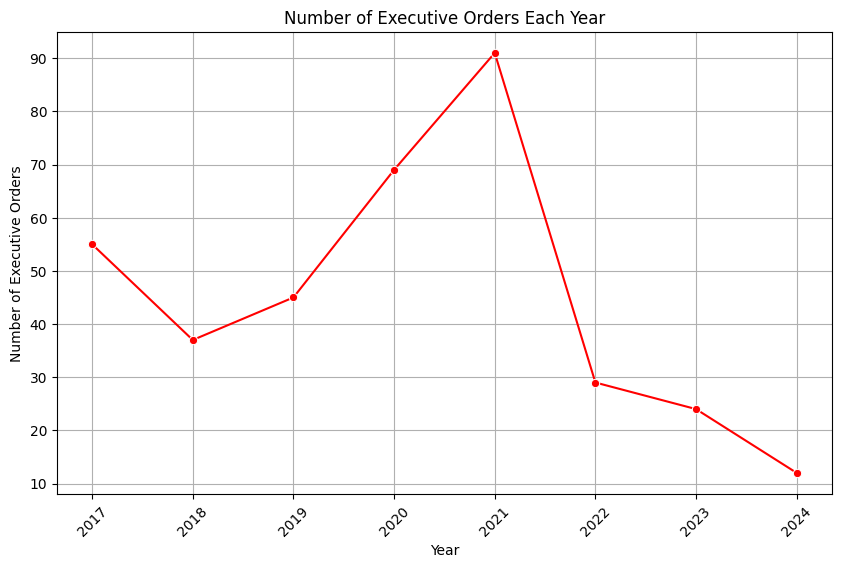

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "Cleaned_Data.csv"
data = pd.read_csv(file_path)
data['signing_date'] = pd.to_datetime(data['signing_date'])
data['year'] = data['signing_date'].dt.year
orders_by_year = data.groupby('year').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=orders_by_year, marker='o', color='red')
plt.title('Number of Executive Orders Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-f2ef78624791>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='president', data=orders_by_president, palette='Reds')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


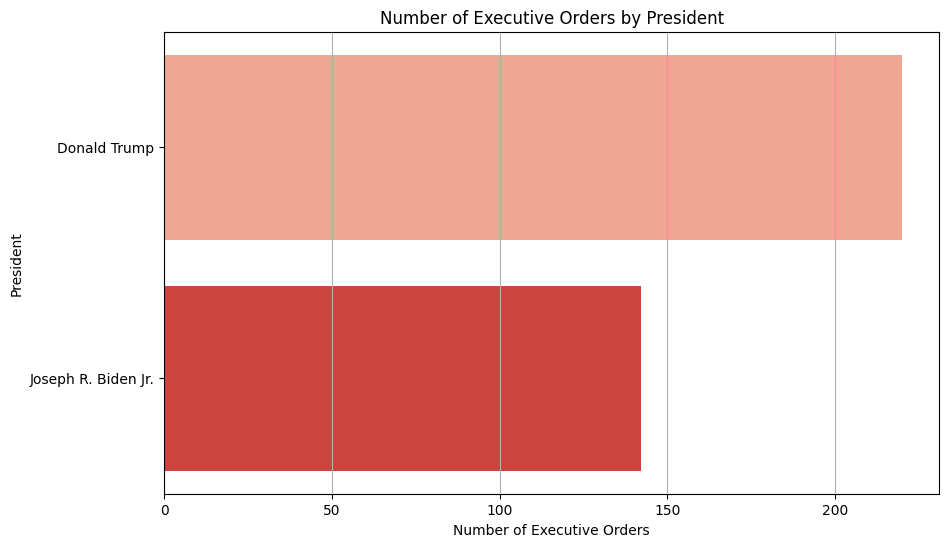

In [ ]:
orders_by_president = data['president'].value_counts().reset_index()
orders_by_president.columns = ['president', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='president', data=orders_by_president, palette='Reds')
plt.title('Number of Executive Orders by President')
plt.xlabel('Number of Executive Orders')
plt.ylabel('President')
plt.grid(True, axis='x')
plt.show()

<Figure size 1200x800 with 0 Axes>

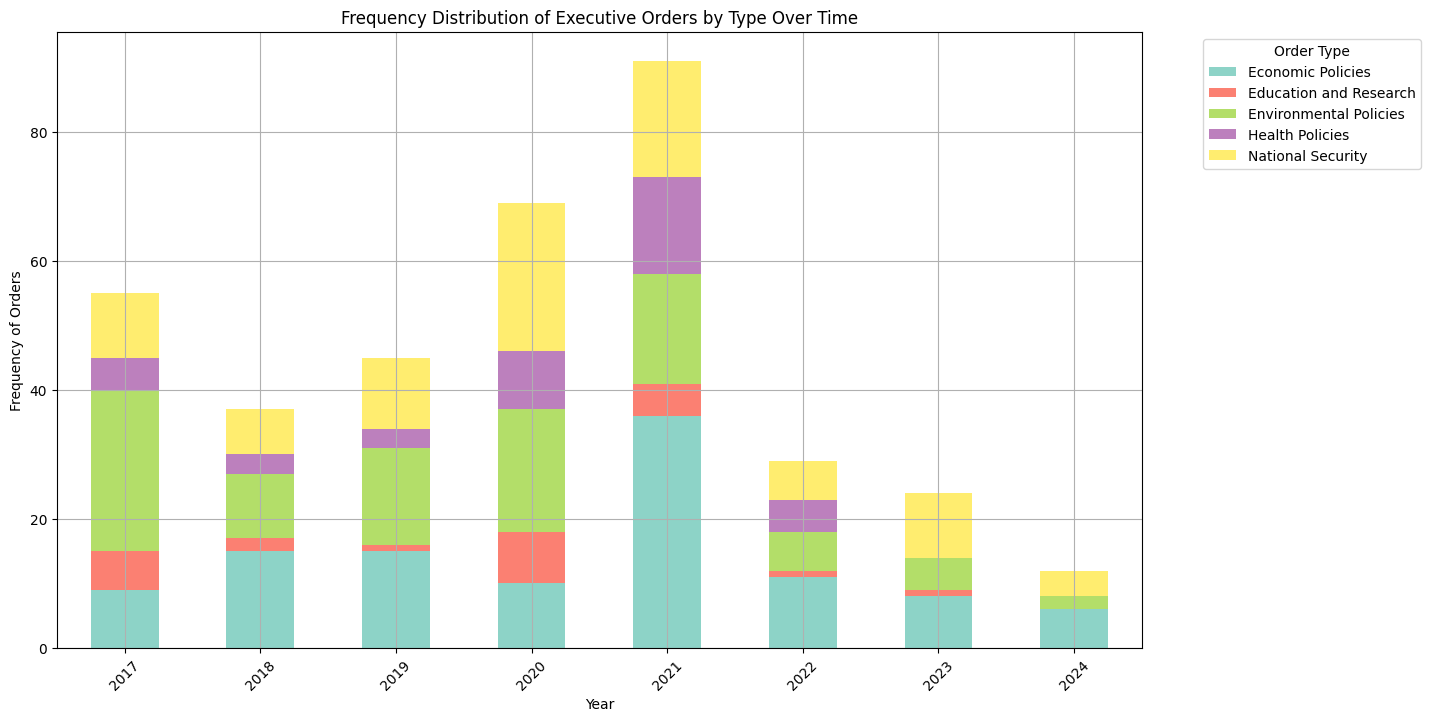

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
data['text'] = data['title'] + ' ' + data['executive_order_notes']
data['text'] = data['text'].fillna('').str.lower()

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])


num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
data['cluster'] = kmeans.labels_


cluster_labels = {
    0: 'Health Policies',
    1: 'Economic Policies',
    2: 'National Security',
    3: 'Education and Research',
    4: 'Environmental Policies'
}

data['category'] = data['cluster'].map(cluster_labels)
data['year'] = data['signing_date'].dt.year
orders_by_category = data.groupby(['year', 'category']).size().reset_index(name='count')

orders_pivot = orders_by_category.pivot(index='year', columns='category', values='count').fillna(0)
plt.figure(figsize=(12, 8))
orders_pivot.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14, 8))
plt.title('Frequency Distribution of Executive Orders by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency of Orders')
plt.legend(title='Order Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
orders_frequency_by_year = data.groupby(['year', 'category']).size().reset_index(name='frequency')
frequency_pivot = orders_frequency_by_year.pivot(index='year', columns='category', values='frequency').fillna(0)
import ace_tools as tools; tools.display_dataframe_to_user("Type of Executive Orders by Year", frequency_pivot)
